Tests statistical significance for different molecular design strategies related to the side chains.

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns
import numpy as np

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title

sns.set_style("white")

In [6]:
def wilcoxon_test(df, PCE1, PCE2):
    print(f"Number of samples: {len(df)}")
    # checks if values have a normal distribution
    """stat1, p1 = stats.shapiro(df[PCE1])
    stat2, p2 = stats.shapiro(df[PCE2])
    print(f"The shapiro stats are: {p1} and {p2}")"""

    # Wilcoxon test
    if len(df) < 30:
        stat2, p = stats.wilcoxon(df[PCE1], df[PCE2])
        print("Less than 30 samples so Wilcoxon test will be performed")
        if p < 0.05:
            print("The findings are significant! p-value is: %s" %p)
        else:
            print("The findings are NOT significant. p-value is: %s" %p)

    # t-test
    else:
        print("More than 30 samples so t-test will be performed")
        stat2, p = stats.ttest_rel(df[PCE1], df[PCE2])
        if p < 0.05:
            print("The findings are significant! p-value is: %s" %p)
        else:
            print("The findings are NOT significant. p-value is: %s" %p)

    print(f"The average PCE of {PCE1} is: {mean(df[PCE1])}")
    print(f"The average PCE of {PCE2} is: {mean(df[PCE2])}")
    avg_diff = mean(df["difference"])
    print(f"The average difference between the PCE is: {avg_diff}")


def plot_violin(df, cat1, cat2, title, label1, label2, figname, settitle=True):
    x1 =  list(df[cat1])
    x2 =  list(df[cat2])
    PCE = [x1, x2]
    positions = [1, 2]

    # plot data
    fig, ax = plt.subplots()
    violin = ax.violinplot(PCE, positions, showmeans = True)

    colors = ["#88CCEE", "#CC6677"]

    violin["bodies"][0].set_facecolor(colors[0])
    violin["bodies"][1].set_facecolor(colors[1])

    for pc in violin["bodies"]:
        pc.set_alpha(0.7)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans'):
        vp = violin[partname]
        vp.set_edgecolor("black")
        #vp.set_linewidth(2)

    plt.grid(axis='y', alpha=0.7)

    min_x1 = min(x1)
    max_x1 = max(x1)
    min_x2 = min(x2)
    max_x2 = max(x2)
    if min_x1 < min_x2:
        min_PCE = min_x1
    else:
        min_PCE = min_x2

    if max_x1 > max_x2:
        max_PCE = max_x1
    else:
        max_PCE = max_x2

    plt.yticks(np.arange(int(min_PCE), int(max_PCE+2), 2))
    ax.set_xticks([1, 2])
    ax.set_xticklabels([label1, label2])
    ax.set_ylabel("PCE (%)")
    if settitle == True:
        plt.title(title)
    plt.tight_layout()

    #plt.savefig(f'{figname}.pdf', dpi=600)
    plt.savefig(f'{figname}.png', dpi=600)

    plt.show()


def plot_hist(df, cat1, cat2, title, label1, label2, figname, settitle=True):
    # difference in PCE between the 2 categories
    diff_PCE= df[cat1] - df[cat2]

    sns.histplot(diff_PCE, kde=True, color="rebeccapurple", binwidth=1, binrange=(int(min(diff_PCE))-1, int(max(diff_PCE)+1)))
    
    if int(min(diff_PCE)) %2 ==0:
        plt.xticks(np.arange(int(min(diff_PCE)-2), int(max(diff_PCE)+2), 2))
    else:
        plt.xticks(np.arange(int(min(diff_PCE)-1), int(max(diff_PCE)+1), 2))
    plt.axvline(color="black", linestyle="--", linewidth=3)

    plt.xlabel(f"{label1} PCE - {label2} PCE")
    if settitle == True:
        plt.title(title)

    plt.tight_layout()

    #plt.savefig(f'{figname}_PCE_diff_hist.pdf', dpi=600)
    plt.savefig(f'{figname}_PCE_diff_hist.png', dpi=600)

    plt.show()

## Length of branched chains

Comparing if a medium length size of chain like an overall length of 8 atoms (e.g. butyloctyl (BO) and C8C8)

Number of samples: 33
More than 30 samples so t-test will be performed
The findings are significant! p-value is: 0.0010760932635976927
The average PCE of medium_branched_PCE is: 14.732424242424242
The average PCE of other_length_PCE is: 12.976969696969697
The average difference between the PCE is: 1.7554545454545454


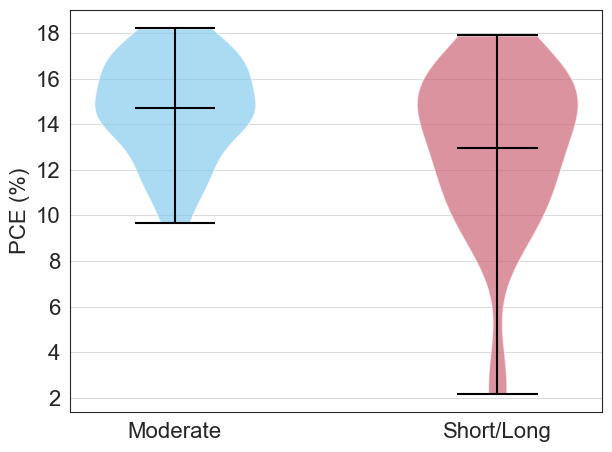

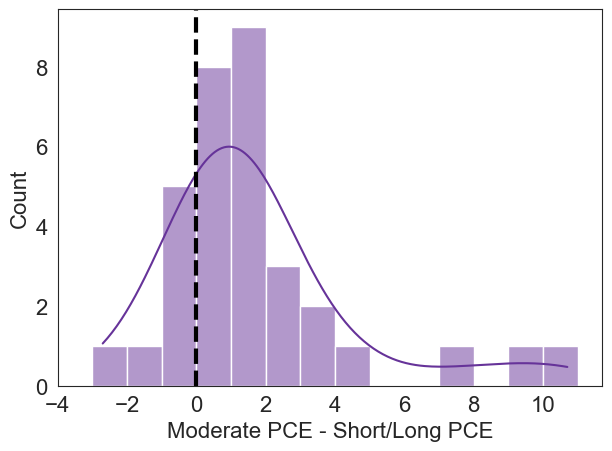

In [7]:
df = pd.read_csv("branched_length_8.csv")
wilcoxon_test(df, "medium_branched_PCE", "other_length_PCE")
plot_violin(df, "medium_branched_PCE", "other_length_PCE", "Branched Chain Length", "Moderate", "Short/Long", "branched_length_8", settitle=False)
plot_hist(df, "medium_branched_PCE", "other_length_PCE", "Branched Chain Length", "Moderate", "Short/Long", "branched_length_8" , settitle=False)

## Length of linear chains

Comparing only carbon linear chains. The target medium length is either 8 or 9 carbons, and they are compared to shorter or longer lengths like C6 or C11

Number of samples: 20
Less than 30 samples so Wilcoxon test will be performed
The findings are significant! p-value is: 0.009435653686523438
The average PCE of medium_linear_PCE is: 14.263
The average PCE of other_length_PCE is: 12.989
The average difference between the PCE is: 1.274


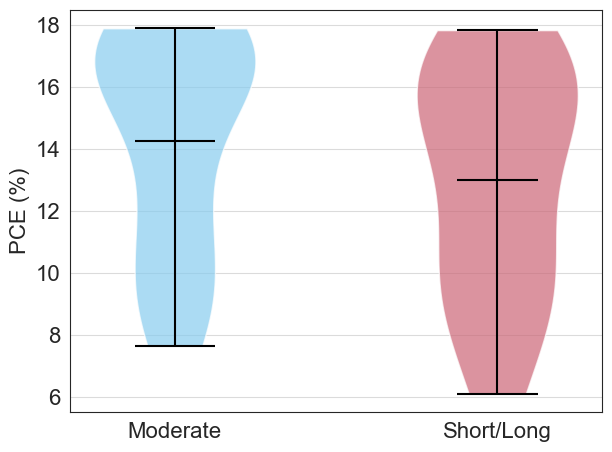

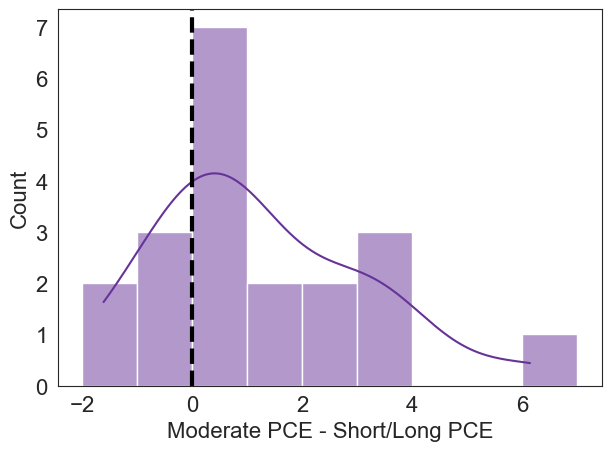

In [8]:
df = pd.read_csv("linear_length_8.csv")
wilcoxon_test(df, "medium_linear_PCE", "other_length_PCE")
plot_violin(df, "medium_linear_PCE", "other_length_PCE", "Linear Chain Length", "Moderate", "Short/Long", "linear_chain_length_8", settitle=False)
plot_hist(df, "medium_linear_PCE", "other_length_PCE", "Linear Chain Length", "Moderate", "Short/Long", "linear_chain_length_8", settitle=False)

To look how the PCE changes with carbon length. The first plot color codes so green is that the medium length has higher PCE than short/long, while red is it does not follow this trend. The second plot is similar, but the lime green shows comparisons between short and medium, while blue shows medium and long. 

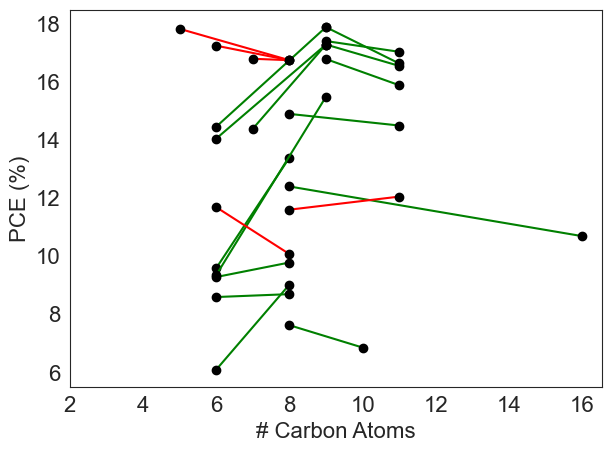

In [9]:
num_carbons_good =[]
num_carbons_bad =[]
PCE_list_good = []
PCE_list_bad = []

for x in range(len(df)):
    if df["difference"][x] > 0:
        num_carbons_good.append(df["med_num_carbons"][x])
        num_carbons_good.append(df["other_num_carbons"][x])
        PCE_list_good.append(df["medium_linear_PCE"][x])
        PCE_list_good.append(df["other_length_PCE"][x])
    else:
        num_carbons_bad.append(df["med_num_carbons"][x])
        num_carbons_bad.append(df["other_num_carbons"][x])
        PCE_list_bad.append(df["medium_linear_PCE"][x])
        PCE_list_bad.append(df["other_length_PCE"][x])

xx_good = np.vstack([num_carbons_good[0::2],num_carbons_good[1::2]])
yy_good = np.vstack([PCE_list_good[0::2],PCE_list_good[1::2]])

xx_bad = np.vstack([num_carbons_bad[0::2],num_carbons_bad[1::2]])
yy_bad = np.vstack([PCE_list_bad[0::2],PCE_list_bad[1::2]])

fig, ax = plt.subplots()
ax.plot(xx_good,yy_good, '-og', mfc='k', mec='k')
ax.plot(xx_bad, yy_bad, '-or', mfc='k', mec='k')
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax.set_ylabel("PCE (%)")
ax.set_xlabel('# Carbon Atoms')
plt.tight_layout()
#plt.savefig('linear_chains_dotline_follows_trend.pdf', dpi=600)
plt.savefig('linear_chains_dotline_follows_trend.png', dpi=600)

plt.show()

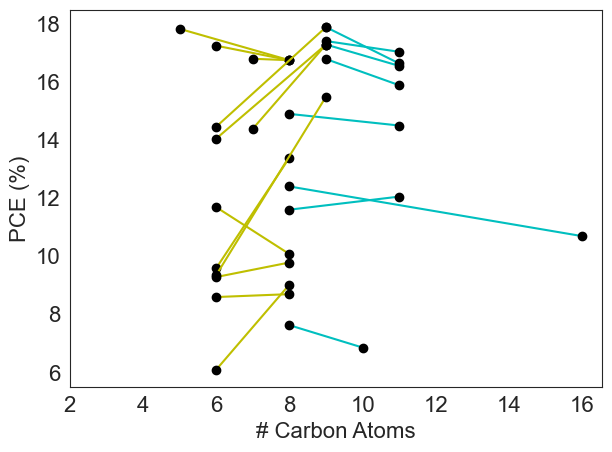

In [10]:
num_carbons_good =[]
num_carbons_bad =[]
PCE_list_good = []
PCE_list_bad = []

for x in range(len(df)):
    if df["difference_atom_length"][x] > 0:
        num_carbons_good.append(df["med_num_carbons"][x])
        num_carbons_good.append(df["other_num_carbons"][x])
        PCE_list_good.append(df["medium_linear_PCE"][x])
        PCE_list_good.append(df["other_length_PCE"][x])
    else:
        num_carbons_bad.append(df["med_num_carbons"][x])
        num_carbons_bad.append(df["other_num_carbons"][x])
        PCE_list_bad.append(df["medium_linear_PCE"][x])
        PCE_list_bad.append(df["other_length_PCE"][x])

xx_good = np.vstack([num_carbons_good[0::2],num_carbons_good[1::2]])
yy_good = np.vstack([PCE_list_good[0::2],PCE_list_good[1::2]])

xx_bad = np.vstack([num_carbons_bad[0::2],num_carbons_bad[1::2]])
yy_bad = np.vstack([PCE_list_bad[0::2],PCE_list_bad[1::2]])

fig, ax = plt.subplots()
ax.plot(xx_good,yy_good, '-oc', mfc='k', mec='k')
ax.plot(xx_bad, yy_bad, '-oy', mfc='k', mec='k')
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
ax.set_ylabel("PCE (%)")
ax.set_xlabel('# Carbon Atoms')
plt.tight_layout()
#plt.savefig('linear_chains_dotline_long_or_short.pdf', dpi=600)
plt.savefig('linear_chains_dotline_long_or_short.png', dpi=600)

plt.show()

## Meta vs Para

Compares the meta or para position of a hexylphenyl 
chain

Number of samples: 7
Less than 30 samples so Wilcoxon test will be performed
The findings are significant! p-value is: 0.015625
The average PCE of para_PCE is: 10.012857142857143
The average PCE of meta_PCE is: 11.277142857142858
The average difference between the PCE is: 1.2642857142857142


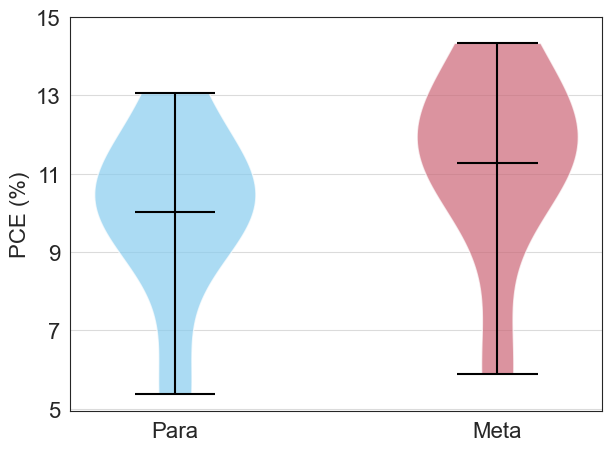

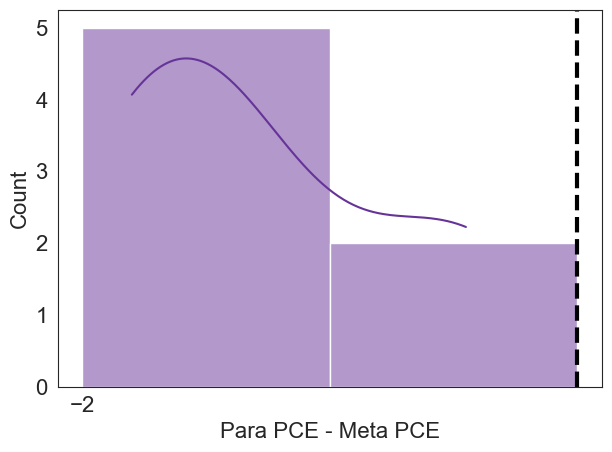

In [11]:
df = pd.read_csv("meta_vs_para.csv")
wilcoxon_test(df, "para_PCE", "meta_PCE")
plot_violin(df, "para_PCE", "meta_PCE", "Meta vs. Para", "Para", "Meta", "meta_vs_para", settitle=False)
plot_hist(df, "para_PCE", "meta_PCE", "Meta vs. Para", "Para", "Meta", "meta_vs_para", settitle=False)

## Branched vs Linear

Compared branched vs linear side chains at the same position, where the overall length of the side chain was within 2 atoms. For example, 2-butyloctyl vs n-octyl or 2-butyloctyl vs n-hexyl was ok but 2-ethylhexyl vs n-nonyl was not.

Number of samples: 26
Less than 30 samples so Wilcoxon test will be performed
The findings are significant! p-value is: 0.008563418533338075
The average PCE of linear_PCE is: 10.095
The average PCE of branched_PCE is: 11.208461538461538
The average difference between the PCE is: -1.1134615384615385


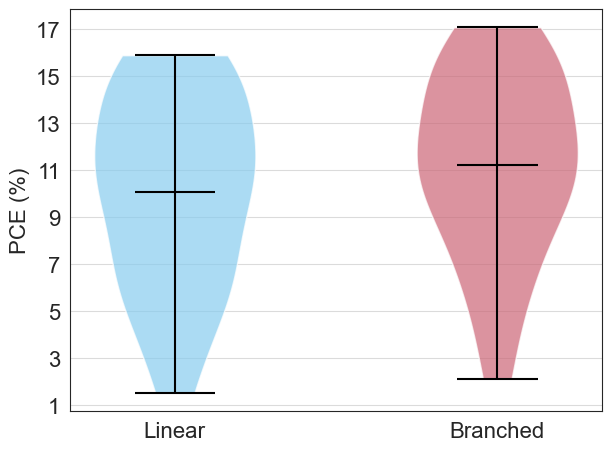

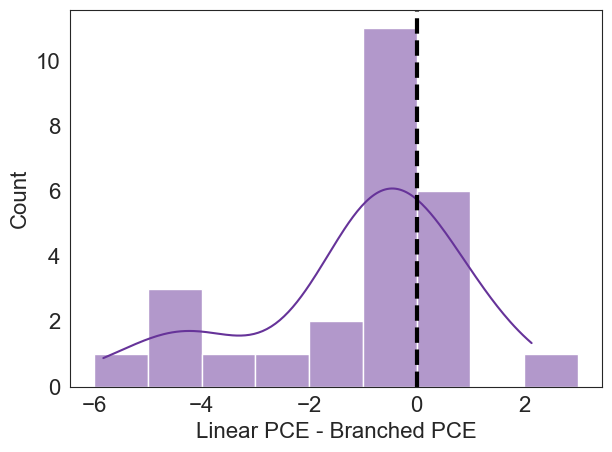

In [12]:
df = pd.read_csv("branched_vs_linear_within2atoms.csv")
wilcoxon_test(df, "linear_PCE", "branched_PCE")
plot_violin(df, "linear_PCE", "branched_PCE", "Linear vs. Branched", "Linear", "Branched", "linear_vs_branched_within2atoms", settitle=False)
plot_hist(df, "linear_PCE", "branched_PCE", "Linear vs. Branched", "Linear", "Branched", "linear_vs_branched_within2atoms", settitle=False)

## Alkyl vs Alkoxy chains

Compares alkyl and alkoxy chains (either as linear or attached to a phenyl ring) where the overall length is within 2 atoms.

Number of samples: 22
Less than 30 samples so Wilcoxon test will be performed
The findings are NOT significant. p-value is: 0.8736042976379395
The average PCE of carbon_PCE is: 9.895227272727272
The average PCE of oxygen_PCE is: 10.101818181818182
The average difference between the PCE is: -0.20659090909090908


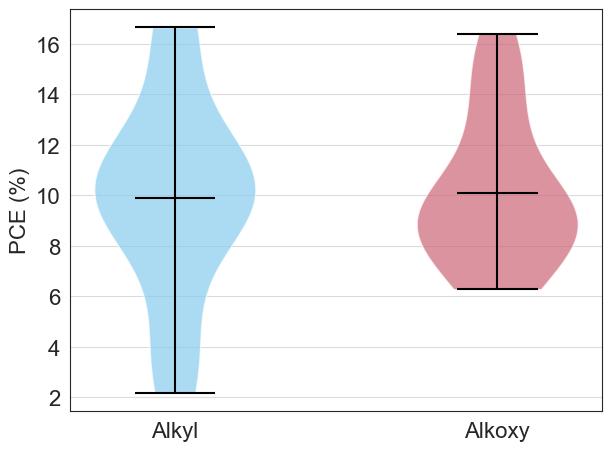

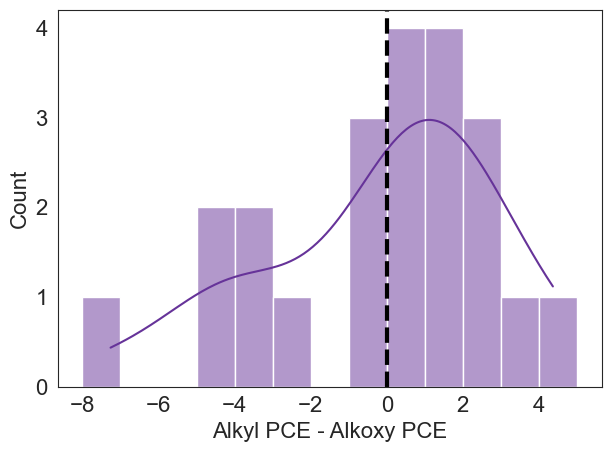

In [13]:
df = pd.read_csv("oxygen_vs_carbon_chain_within2atoms.csv")
wilcoxon_test(df, "carbon_PCE", "oxygen_PCE")
plot_violin(df, "carbon_PCE", "oxygen_PCE", "Alkyl vs. Alkoxy Chain", "Alkyl", "Alkoxy", "alkyl_vs_alkoxy", settitle=False)
plot_hist(df, "carbon_PCE", "oxygen_PCE", "Alkyl vs. Alkoxy Chain", "Alkyl", "Alkoxy", "alkyl_vs_alkoxy", settitle=False)

## Phenyl vs Linear chain

All comparisons compare C8 with ph-C6

Number of samples: 18
Less than 30 samples so Wilcoxon test will be performed
The findings are significant! p-value is: 0.0023345947265625
The average PCE of linear_PCE is: 9.164444444444445
The average PCE of phenyl_PCE is: 7.581666666666667
The average difference between the PCE is: 1.5827777777777778


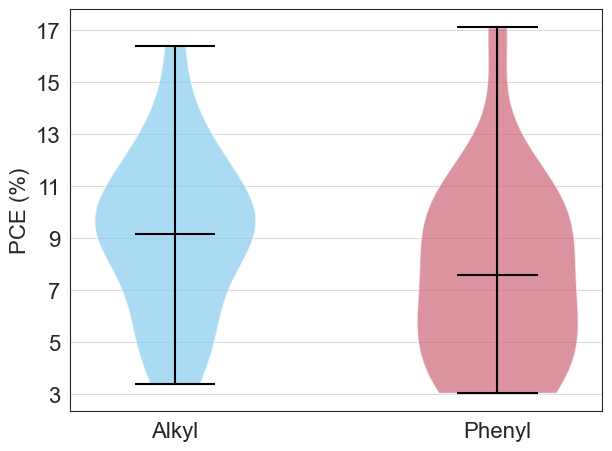

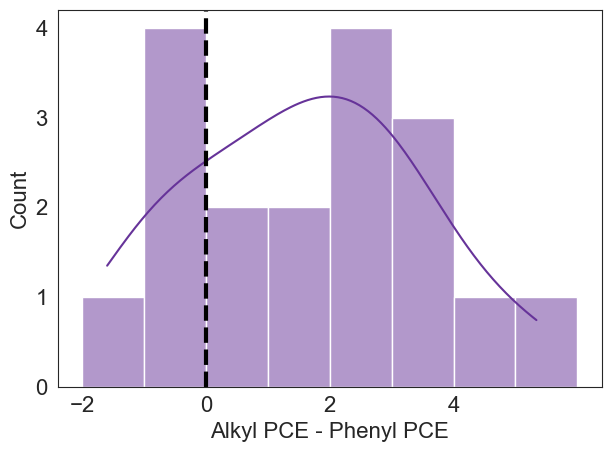

In [14]:
df = pd.read_csv("phenyl_vs_linear.csv")
wilcoxon_test(df, "linear_PCE", "phenyl_PCE")
plot_violin(df, "linear_PCE", "phenyl_PCE", "Alkyl vs. Aromatic Chain", "Alkyl", "Phenyl", "alkyl_vs_aromatic", settitle=False)
plot_hist(df, "linear_PCE", "phenyl_PCE", "Alkyl vs. Aromatic Chain", "Alkyl", "Phenyl", "alkyl_vs_aromatic", settitle=False)

## Branch position

Looked at if branching on the 2nd atom was better than branching at 1st, 3rd, or 4th positions

Number of samples: 17
Less than 30 samples so Wilcoxon test will be performed
The findings are NOT significant. p-value is: 0.8536376953125
The average PCE of 2_position_PCE is: 13.131176470588235
The average PCE of other_position_PCE is: 12.557647058823528
The average difference between the PCE is: 0.573529411764706


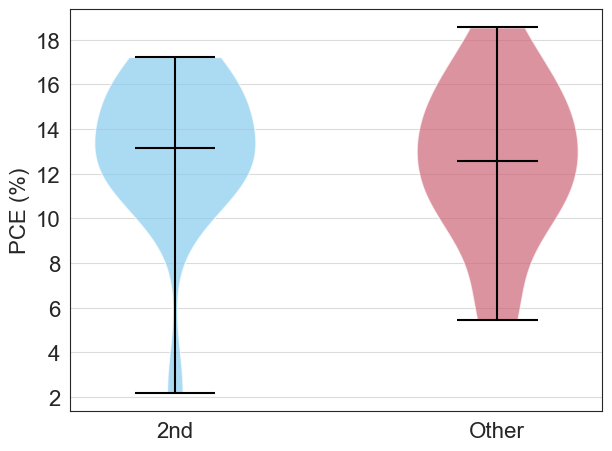

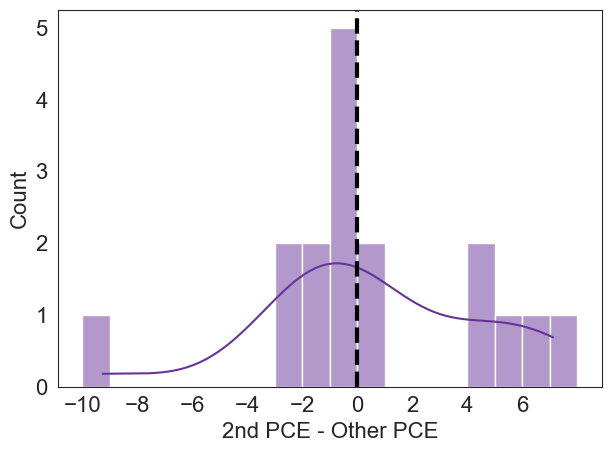

In [15]:
df = pd.read_csv("branch_positions.csv")
wilcoxon_test(df, "2_position_PCE", "other_position_PCE")
plot_violin(df, "2_position_PCE", "other_position_PCE", "Branching Position", "2nd", "Other", "branching_position", settitle=False)
plot_hist(df, "2_position_PCE", "other_position_PCE", "Branching Position", "2nd", "Other", "branching_position", settitle=False)